### Building and training machine learning models to predict the survival of passengers from the titanic dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv", index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In order to process and tune the data, first the data has to be refined for null values so to check the number 
of null value in each column the isnull() function is used along with the sum() function which gives the sum of
the number of null values in each column. 


In [4]:
df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [5]:
df['Age'].fillna(df['Age'].mean(), inplace = True)


It is seen that the age columnn has 177 null values hence I have used the fillna function and filled the null values
this column with the mean age of the the passengers in the dataset.

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,True,False


In [8]:
df = df.dropna(subset = 'Embarked')

As the Embarked column has just 2 null values, and it tells us the place a passenger started their journey from, it seems like an important feature and hence I used dropna() function to just remove the null values of the column

In [9]:
df.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [10]:
df = df.drop(['Cabin'], axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


For the cabin column, out of the 891 rows, 687 rows have no data and hence majority of the column is empty. For this reason I saw fit to remove this column from the dataset in order to better train the models.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [13]:
categories = ['Embarked','Sex']
df[categories] = df[categories].apply(le.fit_transform)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2


In [14]:
df['Parch'].sum()

340

In [15]:
df['SibSp'].sum()

466

In [16]:
df['Age'] = df['Age'].apply(np.floor)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,W./C. 6607,23.4500,2


As the ages are given in precise form, I used the floor() functions to make the ages in a uniform format so that they
are grouped more efficiently.

In [17]:
X = df.drop(['Survived','Name','Ticket'], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000,2
888,1,0,19.0,0,0,30.0000,2
889,3,0,29.0,1,2,23.4500,2


I have made X has the input data for the training purpose, dropping the survived column as it is the target data.
I also droppped Name and ticket column as these are unique for all the passengers and would be unnecessary for the
training of the models

In [18]:
Y = df['Survived']
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 889, dtype: int64

In [19]:
print(X.shape[0], Y.shape[0])

889 889


### LOGISTIC REGRESSION:

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
classifier.score(x_test,y_test)

0.8164794007490637

### NEURAL NETWORK


In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3), max_iter=5000)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=3, max_iter=5000)

In [25]:
from sklearn import metrics

y_pred = mlp.predict(x_train)
print('Training accuracy: \t', metrics.accuracy_score(y_train, y_pred))

Training accuracy: 	 0.7845659163987139


In [26]:
y_predict = mlp.predict(x_test)

print('Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict))

Testing accuracy: 	 0.7902621722846442


### DECISION TREE:

In [27]:
from sklearn.tree import DecisionTreeClassifier
t_model = DecisionTreeClassifier(max_depth = 3)
t_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
y_predict= t_model.predict(x_train)
print('Training accuracy: \t', metrics.accuracy_score(y_train, y_predict))

Training accuracy: 	 0.8215434083601286


In [29]:
y_pred = t_model.predict(x_test) 
print('Testing accuracy: \t', metrics.accuracy_score(y_test, y_pred))

Testing accuracy: 	 0.8389513108614233


In [30]:
df_data=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
df_target=['alive','dead']

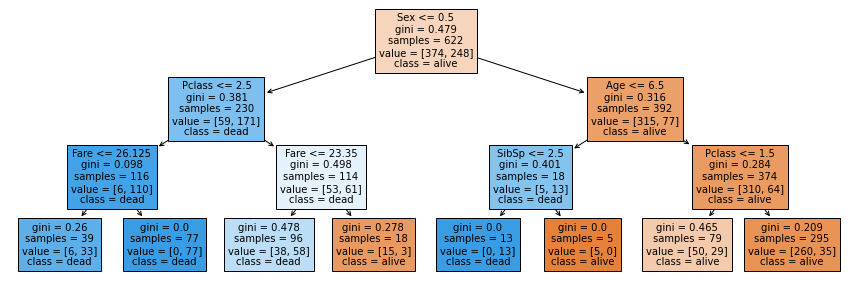

In [31]:
from sklearn import tree
plt.figure(figsize=(15,5))
tree.plot_tree(t_model, feature_names = df_data, class_names = df_target, filled= True, fontsize=10)
plt.savefig('img-dt.png')

IT IS SEEN THAT ALL THE THREE MODELS PERFORM FAIRLY WELL ON THE CLASSIFICATION PROBLEM. HOWEVER, THE DECISION TREE MODEL PERFORMS SLIGHTLY BETTER THAN THE OTHER TWO MODELS. IT ALSO GIVES INSIGHT ON THE FACTORS AFFECTING THE SURVIVAL OF THE PASSENGERS.